In [1]:
import pickle
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from IPython.display import display
import gc

In [2]:
!ls

arms.py
Bandit_Analysis.ipynb
Bandit_experiment.ipynb
Bandit_Regret_Analysis.ipynb
base_analysis.ipynb
cfg.py
eGreedyMAB_BernoulliArm_0.5_Naive_results.pkl
eGreedyMAB_BernoulliArm_0.5_Optimistic_results.pkl
eGreedyMAB_BernoulliArm_1.0_Naive_results.pkl
eGreedyMAB_BernoulliArm_1.0_Optimistic_results.pkl
eGreedyMAB_GaussianArm_0.5_Naive_results.pkl
eGreedyMAB_GaussianArm_0.5_Optimistic_results.pkl
eGreedyMAB_GaussianArm_1.0_Naive_results.pkl
eGreedyMAB_GaussianArm_1.0_Optimistic_results.pkl
ETC_BernoulliArm_1.0_Naive_results.pkl
ETC_GaussianArm_1.0_Naive_results.pkl
mab.py
main.py
__pycache__
test.ipynb
ThompsonSampling_BernoulliArm_1.0_Naive_results.pkl
ThompsonSampling_GaussianArm_1.0_Naive_results.pkl
UCB_BernoulliArm_1.0_Naive_results.pkl
UCB_BernoulliArm_1.0_Optimistic_results.pkl
UCB_GaussianArm_1.0_Naive_results.pkl
UCB_GaussianArm_1.0_Optimistic_results.pkl


In [3]:
def process(df, is_thompson):
    ## get cumulative reward
    cumsum_base = np.array([], dtype='float')
    for e in df['sim'].unique():
        rundf = df[df['sim'] == e]
        run_cumsum = np.cumsum(rundf['reward'])
        cumsum_base = np.append(cumsum_base, run_cumsum)
    df['cumulative_reward'] = cumsum_base
    
    ## check if the optimal arm is selected at each run
    df['chosen_optimal'] = (df['chosen_arm'] == df['optimal_arm']).astype('int')
    
    ## groupby
    if is_thompson:
        result = df[['step', 'reward', 'chosen_optimal']].groupby(by='step').mean(numeric_only=False)
    else:
        result = df[['param', 'step', 'reward', 'chosen_optimal']].groupby(by=['param', 'step']).mean(numeric_only=False)
    result.reset_index(drop=False, inplace=True)
    
    return result

In [4]:
def plot_results(dfs, column, title, model, figsize=(12, 8)):
    split = column.split('_')
    split[0] = split[0][0].upper() + split[0][1:]
    ylabel = ' '.join(split)
    
    plt.figure(figsize=figsize)
    if model == "thompson":
        plt.plot(dfs[column])
    else:  
        for item in dfs:
            if model == "ucb":
                plt.plot(item[column], label=f"conf={item['param'].iloc[0]}")
            elif model == "mab":
                plt.plot(item[column], label=f"epsilon={item['param'].iloc[0]}")
            elif model == "etc":
                plt.plot(item[column], label=f"explore={item['param'].iloc[0]}")
        plt.legend()
    plt.grid(True)
    plt.xlabel("Step")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

# Naive approach

## alpha = 1

In [5]:
with open("./eGreedyMAB_BernoulliArm_1.0_Naive_results.pkl", 'rb') as f:
    bernoulli = pickle.load(f)
    
with open("./eGreedyMAB_GaussianArm_1.0_Naive_results.pkl", 'rb') as f:
    gaussian = pickle.load(f)

In [6]:
bern_results_naive_1 = []
for df in tqdm(bernoulli):
    bern_results_naive_1.append(process(df, False))
    
gaus_results_naive_1 = []
for df in tqdm(gaussian):
    gaus_results_naive_1.append(process(df, False))

100%|██████████| 6/6 [00:32<00:00,  5.46s/it]


In [7]:
del bernoulli
del gaussian
gc.collect()

0

### Optimal Action %

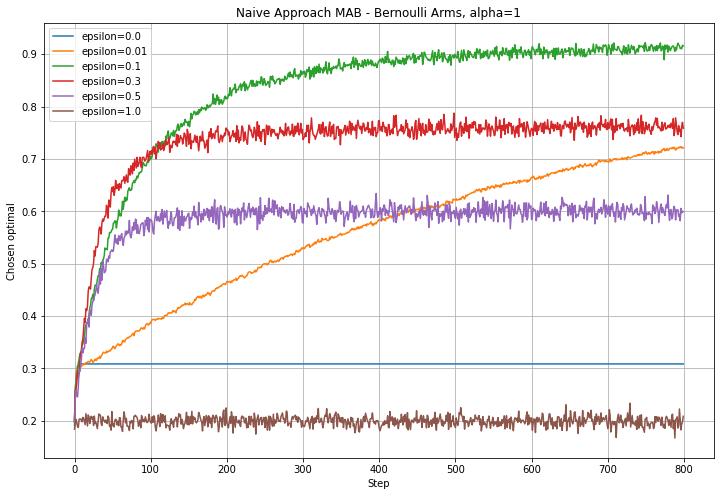

In [8]:
plot_results(bern_results_naive_1, column='chosen_optimal', 
             title="Naive Approach MAB - Bernoulli Arms, alpha=1", model="mab")

In [9]:
plot_results(gaus_results_naive_1, column='chosen_optimal', 
             title="Naive Approach - Gaussian Arms, alpha=1", model="mab")

### Average Reward

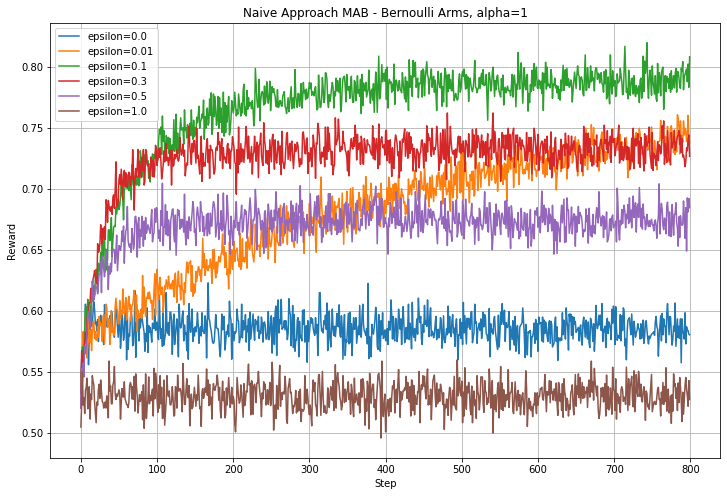

In [10]:
plot_results(bern_results_naive_1, column='reward', 
             title="Naive Approach MAB - Bernoulli Arms, alpha=1", model="mab")

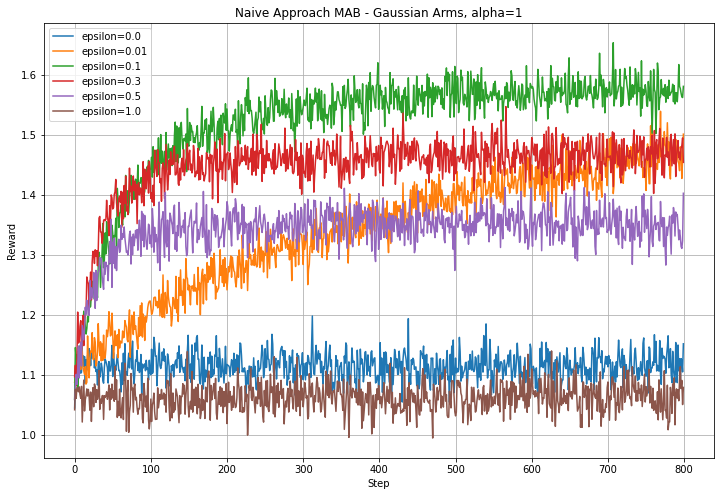

In [11]:
plot_results(gaus_results_naive_1, column='reward', 
             title="Naive Approach MAB - Gaussian Arms, alpha=1", model="mab")

## alpha=0.5

In [12]:
with open("./eGreedyMAB_BernoulliArm_0.5_Naive_results.pkl", 'rb') as f:
    bernoulli_naive_half = pickle.load(f)
    
with open("./eGreedyMAB_GaussianArm_0.5_Naive_results.pkl", 'rb') as f:
    gaussian_naive_half = pickle.load(f)

In [13]:
bern_results_naive_half = []
for df in tqdm(bernoulli_naive_half):
    bern_results_naive_half.append(process(df, False))
    
gaus_results_naive_half = []
for df in tqdm(gaussian_naive_half):
    gaus_results_naive_half.append(process(df, False))

100%|██████████| 6/6 [00:33<00:00,  5.63s/it]


### Optimal action %

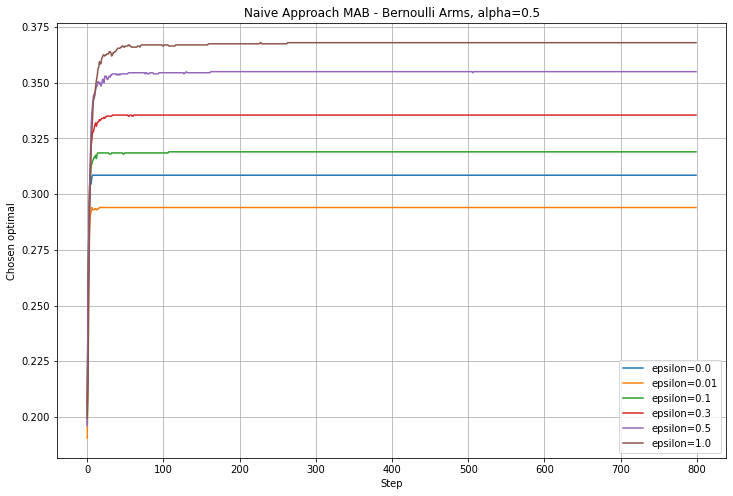

In [14]:
plot_results(bern_results_naive_half, column='chosen_optimal', 
             title="Naive Approach MAB - Bernoulli Arms, alpha=0.5", model="mab")

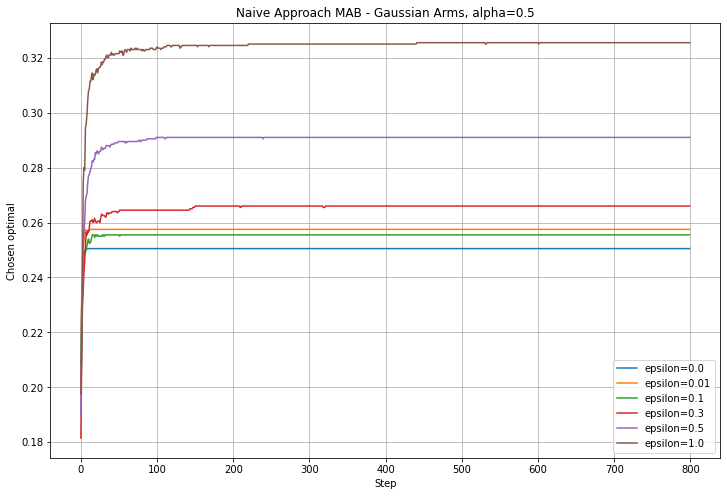

In [15]:
plot_results(gaus_results_naive_half, column='chosen_optimal', 
             title="Naive Approach MAB - Gaussian Arms, alpha=0.5", model="mab")

### Average Reward

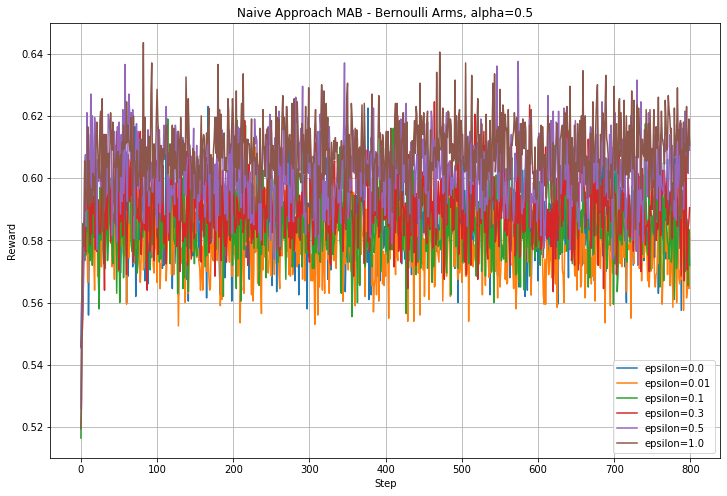

In [16]:
plot_results(bern_results_naive_half, column='reward', 
             title="Naive Approach MAB - Bernoulli Arms, alpha=0.5", model="mab")

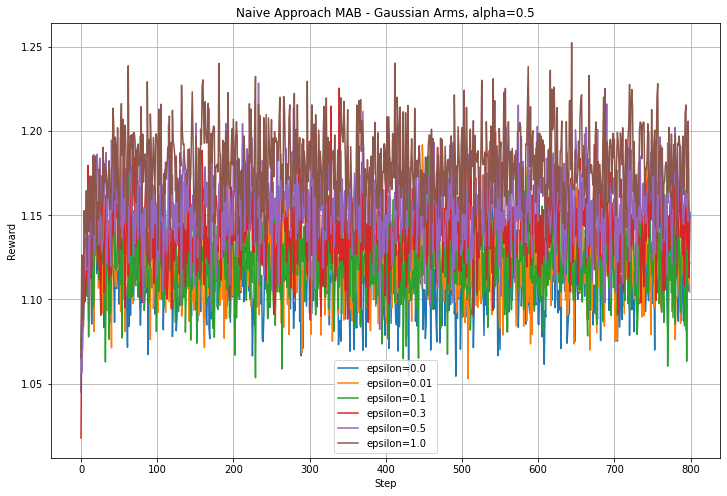

In [17]:
plot_results(gaus_results_naive_half, column='reward', 
             title="Naive Approach MAB - Gaussian Arms, alpha=0.5", model="mab")

# Optimistic Approach

## alpha=1

In [18]:
with open("./eGreedyMAB_BernoulliArm_1.0_Optimistic_results.pkl", 'rb') as f:
    bernoulli_opt_1 = pickle.load(f)
    
with open("./eGreedyMAB_GaussianArm_1.0_Optimistic_results.pkl", 'rb') as f:
    gaussian_opt_1 = pickle.load(f)

In [19]:
bern_results_opt_1 = []
for df in tqdm(bernoulli_opt_1):
    bern_results_opt_1.append(process(df, False))
    
gaus_results_opt_1 = []
for df in tqdm(gaussian_opt_1):
    gaus_results_opt_1.append(process(df, False))

100%|██████████| 6/6 [00:33<00:00,  5.55s/it]


In [20]:
del bernoulli_opt_1
del gaussian_opt_1
gc.collect()

29416

### Optimal action %

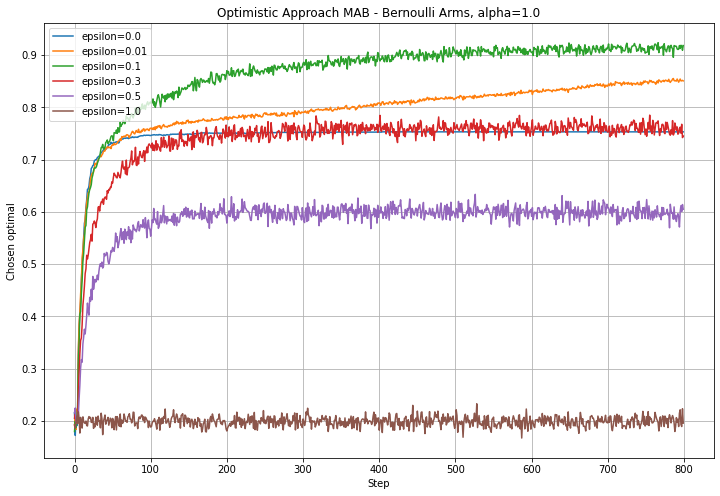

In [21]:
plot_results(bern_results_opt_1, column='chosen_optimal', 
             title="Optimistic Approach MAB - Bernoulli Arms, alpha=1.0", model="mab")

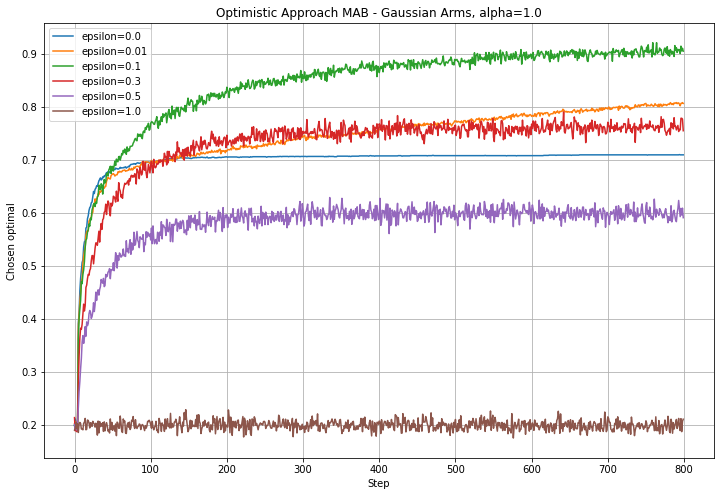

In [22]:
plot_results(gaus_results_opt_1, column='chosen_optimal', 
             title="Optimistic Approach MAB - Gaussian Arms, alpha=1.0", model="mab")

### Average Reward

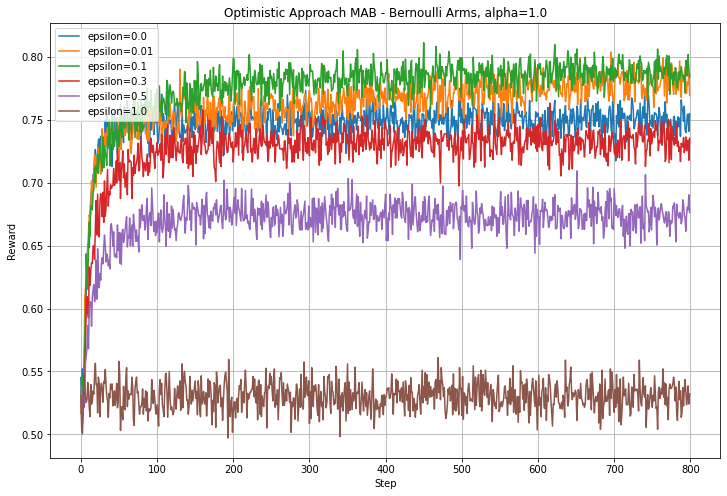

In [23]:
plot_results(bern_results_opt_1, column='reward', 
             title="Optimistic Approach MAB - Bernoulli Arms, alpha=1.0", model="mab")

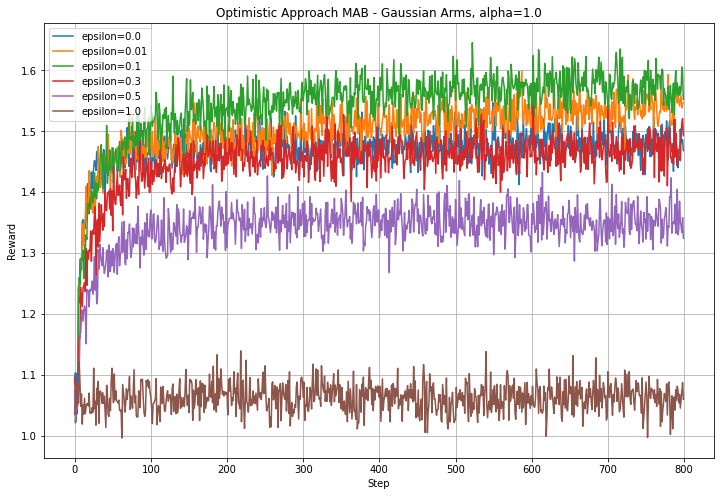

In [24]:
plot_results(gaus_results_opt_1, column='reward', 
             title="Optimistic Approach MAB - Gaussian Arms, alpha=1.0", model="mab")

## alpha=0.5

In [25]:
with open("./eGreedyMAB_BernoulliArm_0.5_Optimistic_results.pkl", 'rb') as f:
    bernoulli_opt_half = pickle.load(f)
    
with open("./eGreedyMAB_GaussianArm_0.5_Optimistic_results.pkl", 'rb') as f:
    gaussian_opt_half = pickle.load(f)

In [26]:
bern_results_opt_half = []
for df in tqdm(bernoulli_opt_half):
    bern_results_opt_half.append(process(df, False))
    
gaus_results_opt_half = []
for df in tqdm(gaussian_opt_half):
    gaus_results_opt_half.append(process(df, False))

100%|██████████| 6/6 [00:32<00:00,  5.46s/it]


In [27]:
del bernoulli_opt_half
del gaussian_opt_half
gc.collect()

14780

### Optimal action %

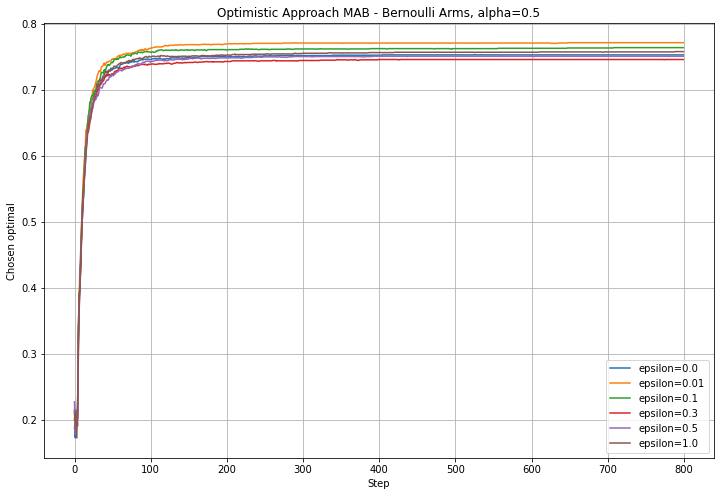

In [28]:
plot_results(bern_results_opt_half, column='chosen_optimal', 
             title="Optimistic Approach MAB - Bernoulli Arms, alpha=0.5", model="mab")

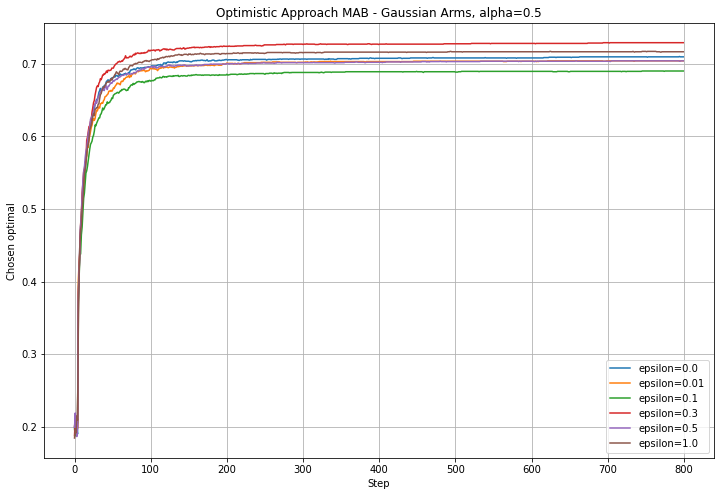

In [29]:
plot_results(gaus_results_opt_half, column='chosen_optimal', 
             title="Optimistic Approach MAB - Gaussian Arms, alpha=0.5", model="mab")

### Average Reward

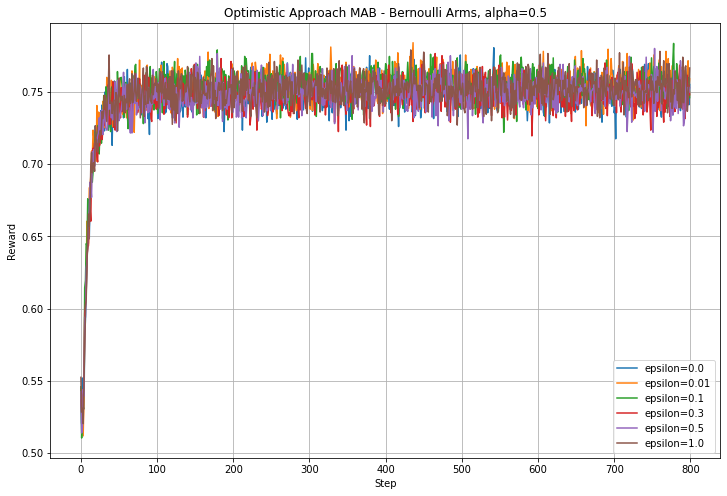

In [30]:
plot_results(bern_results_opt_half, column='reward', 
             title="Optimistic Approach MAB - Bernoulli Arms, alpha=0.5", model="mab")

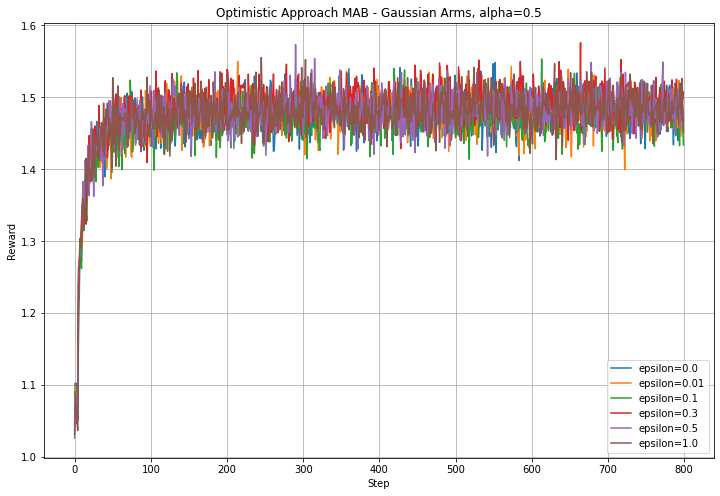

In [31]:
plot_results(gaus_results_opt_half, column='reward', 
             title="Optimistic Approach MAB - Gaussian Arms, alpha=0.5", model="mab")

# Comparison - Naive vs Optimistic

## Bernoulli alpha=1

### Optimal action %

In [32]:
## find the best epsilon
naive_mean_choices = [item['chosen_optimal'].mean() for item in bern_results_naive_1]
naive_argmax = np.argmax(naive_mean_choices)

print(f"Naive Approach\t Best epsilon - {bern_results_naive_1[naive_argmax]['param'].iloc[0]}")

Naive Approach	 Best epsilon - 0.1


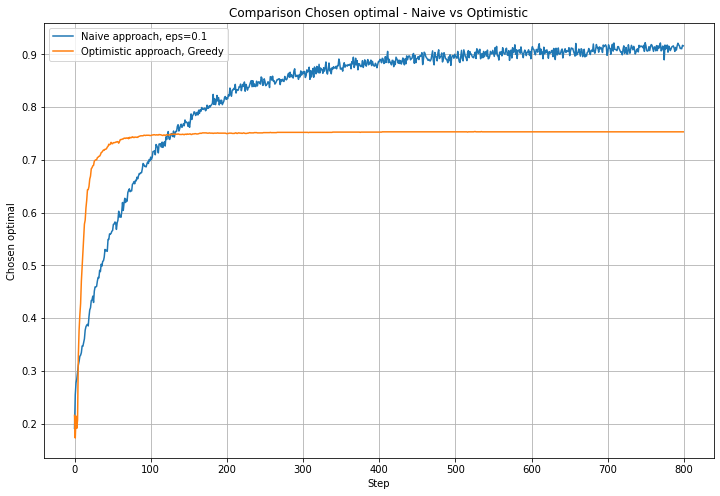

In [33]:
column = 'chosen_optimal'
best_epsilon = bern_results_naive_1[naive_argmax]['param'].iloc[0]
figsize=(12, 8)

split = column.split('_')
split[0] = split[0][0].upper() + split[0][1:]
ylabel = ' '.join(split)

plt.figure(figsize=figsize)
plt.plot(bern_results_naive_1[naive_argmax][column], label=f"Naive approach, eps={best_epsilon}")
plt.plot(bern_results_opt_1[0][column], label=f"Optimistic approach, Greedy")
plt.grid(True)
plt.xlabel("Step")
plt.ylabel(ylabel)
plt.legend()
plt.title(f"Comparison {ylabel} - Naive vs Optimistic")
plt.show()

### Average reward

In [34]:
## find the best epsilon
naive_mean_reward = [item['reward'].mean() for item in bern_results_naive_1]
naive_argmax = np.argmax(naive_mean_reward)

print(f"Naive Approach\t Best epsilon - {bern_results_naive_1[naive_argmax]['param'].iloc[0]}")

Naive Approach	 Best epsilon - 0.1


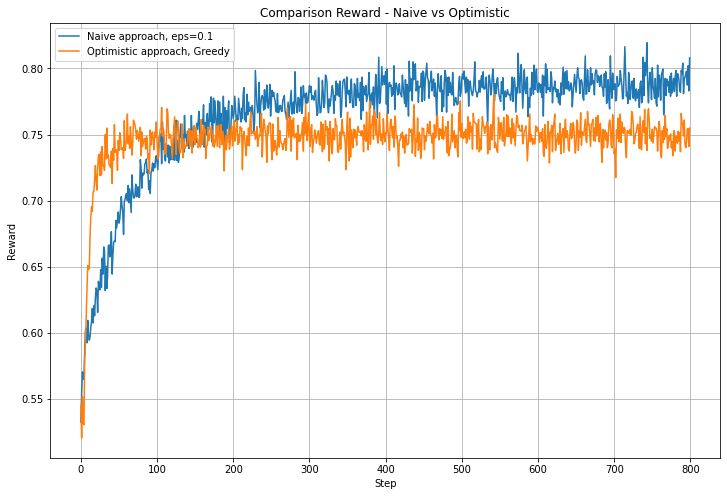

In [35]:
column = 'reward'
best_epsilon = bern_results_naive_1[naive_argmax]['param'].iloc[0]
figsize=(12, 8)

split = column.split('_')
split[0] = split[0][0].upper() + split[0][1:]
ylabel = ' '.join(split)

plt.figure(figsize=figsize)
plt.plot(bern_results_naive_1[naive_argmax][column], label=f"Naive approach, eps={best_epsilon}")
plt.plot(bern_results_opt_1[0][column], label=f"Optimistic approach, Greedy")
plt.grid(True)
plt.xlabel("Step")
plt.ylabel(ylabel)
plt.legend()
plt.title(f"Comparison {ylabel} - Naive vs Optimistic")
plt.show()

## Bernoulli alpha=0.5

### Optimal action %

In [36]:
## find the best epsilon
naive_mean_choices = [item['chosen_optimal'].mean() for item in bern_results_naive_half]
naive_argmax = np.argmax(naive_mean_choices)

print(f"Naive Approach\t Best epsilon - {bern_results_naive_half[naive_argmax]['param'].iloc[0]}")

Naive Approach	 Best epsilon - 1.0


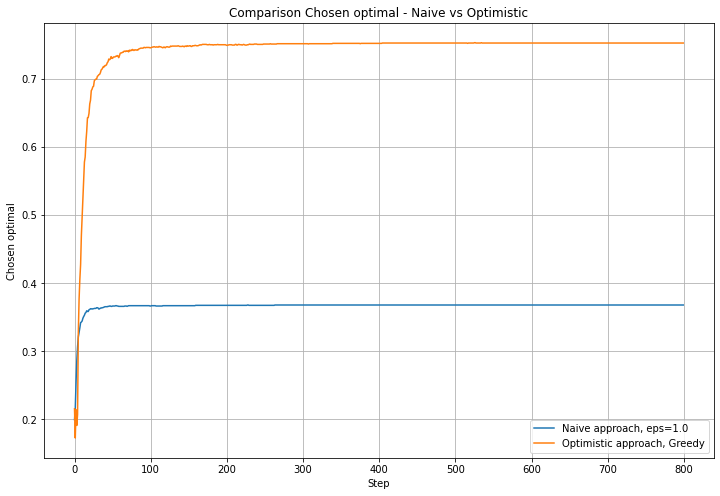

In [37]:
column = 'chosen_optimal'
best_epsilon = bern_results_naive_half[naive_argmax]['param'].iloc[0]
figsize=(12, 8)

split = column.split('_')
split[0] = split[0][0].upper() + split[0][1:]
ylabel = ' '.join(split)

plt.figure(figsize=figsize)
plt.plot(bern_results_naive_half[naive_argmax][column], label=f"Naive approach, eps={best_epsilon}")
plt.plot(bern_results_opt_half[0][column], label=f"Optimistic approach, Greedy")
plt.grid(True)
plt.xlabel("Step")
plt.ylabel(ylabel)
plt.legend()
plt.title(f"Comparison {ylabel} - Naive vs Optimistic")
plt.show()

### Average reward

In [38]:
## find the best epsilon
naive_mean_reward = [item['reward'].mean() for item in bern_results_naive_half]
naive_argmax = np.argmax(naive_mean_reward)

print(f"Naive Approach\t Best epsilon - {bern_results_naive_half[naive_argmax]['param'].iloc[0]}")

Naive Approach	 Best epsilon - 1.0


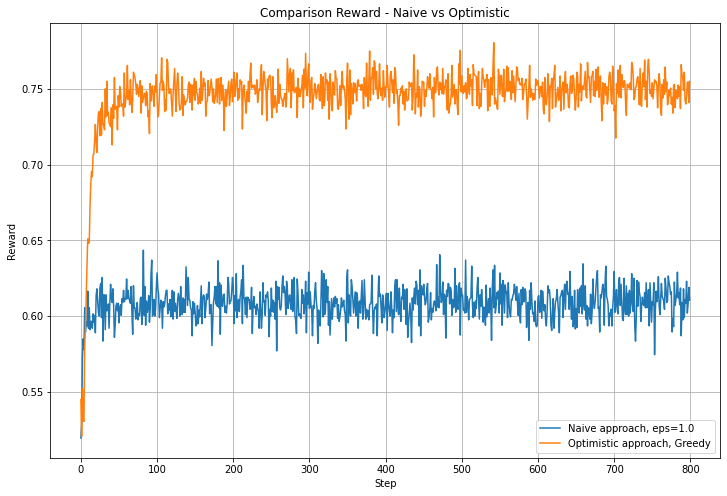

In [39]:
column = 'reward'
best_epsilon = bern_results_naive_half[naive_argmax]['param'].iloc[0]
figsize=(12, 8)

split = column.split('_')
split[0] = split[0][0].upper() + split[0][1:]
ylabel = ' '.join(split)

plt.figure(figsize=figsize)
plt.plot(bern_results_naive_half[naive_argmax][column], label=f"Naive approach, eps={best_epsilon}")
plt.plot(bern_results_opt_half[0][column], label=f"Optimistic approach, Greedy")
plt.grid(True)
plt.xlabel("Step")
plt.ylabel(ylabel)
plt.legend()
plt.title(f"Comparison {ylabel} - Naive vs Optimistic")
plt.show()

## Gaussian alpha=1

### Optimal action %

In [40]:
## find the best epsilon
naive_mean_choices = [item['chosen_optimal'].mean() for item in gaus_results_naive_1]
naive_argmax = np.argmax(naive_mean_choices)

print(f"Naive Approach\t Best epsilon - {gaus_results_naive_1[naive_argmax]['param'].iloc[0]}")

Naive Approach	 Best epsilon - 0.1


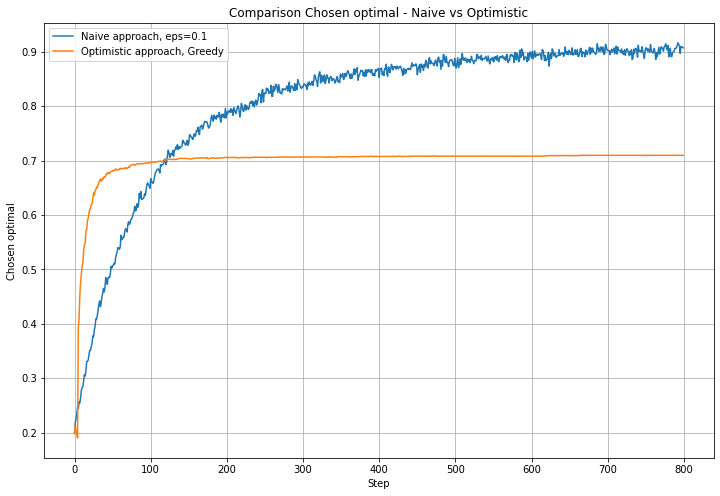

In [41]:
column = 'chosen_optimal'
best_epsilon = gaus_results_naive_1[naive_argmax]['param'].iloc[0]
figsize=(12, 8)

split = column.split('_')
split[0] = split[0][0].upper() + split[0][1:]
ylabel = ' '.join(split)

plt.figure(figsize=figsize)
plt.plot(gaus_results_naive_1[naive_argmax][column], label=f"Naive approach, eps={best_epsilon}")
plt.plot(gaus_results_opt_1[0][column], label=f"Optimistic approach, Greedy")
plt.grid(True)
plt.xlabel("Step")
plt.ylabel(ylabel)
plt.legend()
plt.title(f"Comparison {ylabel} - Naive vs Optimistic")
plt.show()

### Average reward

In [42]:
## find the best epsilon
naive_mean_reward = [item['reward'].mean() for item in gaus_results_naive_1]
naive_argmax = np.argmax(naive_mean_reward)

print(f"Naive Approach\t Best epsilon - {gaus_results_naive_1[naive_argmax]['param'].iloc[0]}")

Naive Approach	 Best epsilon - 0.1


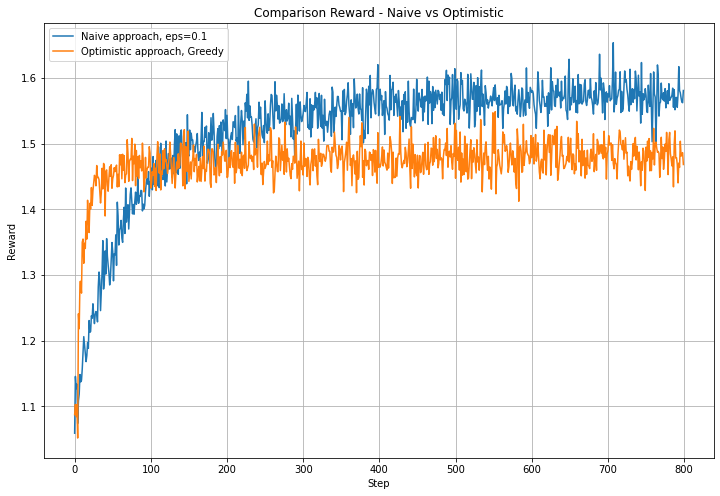

In [43]:
column = 'reward'
best_epsilon = gaus_results_naive_1[naive_argmax]['param'].iloc[0]
figsize=(12, 8)

split = column.split('_')
split[0] = split[0][0].upper() + split[0][1:]
ylabel = ' '.join(split)

plt.figure(figsize=figsize)
plt.plot(gaus_results_naive_1[naive_argmax][column], label=f"Naive approach, eps={best_epsilon}")
plt.plot(gaus_results_opt_1[0][column], label=f"Optimistic approach, Greedy")
plt.grid(True)
plt.xlabel("Step")
plt.ylabel(ylabel)
plt.legend()
plt.title(f"Comparison {ylabel} - Naive vs Optimistic")
plt.show()

## Gaussian alpha=0.5

### Optimal action %

In [44]:
## find the best epsilon
naive_mean_choices = [item['chosen_optimal'].mean() for item in gaus_results_naive_half]
naive_argmax = np.argmax(naive_mean_choices)

print(f"Naive Approach\t Best epsilon - {gaus_results_naive_half[naive_argmax]['param'].iloc[0]}")

Naive Approach	 Best epsilon - 1.0


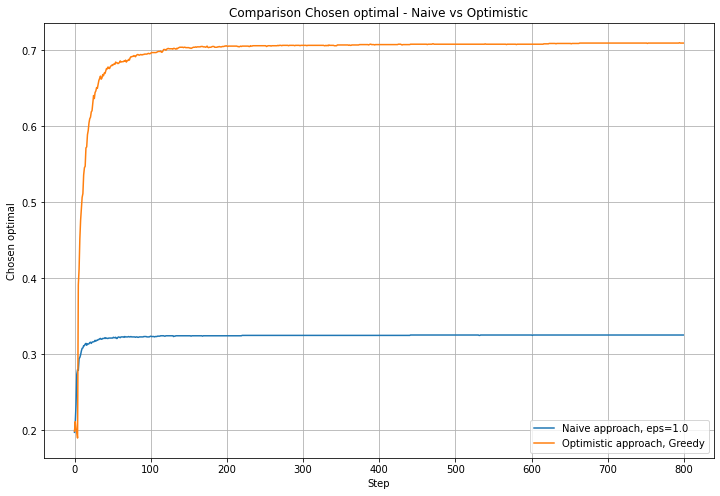

In [45]:
column = 'chosen_optimal'
best_epsilon = gaus_results_naive_half[naive_argmax]['param'].iloc[0]
figsize=(12, 8)

split = column.split('_')
split[0] = split[0][0].upper() + split[0][1:]
ylabel = ' '.join(split)

plt.figure(figsize=figsize)
plt.plot(gaus_results_naive_half[naive_argmax][column], label=f"Naive approach, eps={best_epsilon}")
plt.plot(gaus_results_opt_half[0][column], label=f"Optimistic approach, Greedy")
plt.grid(True)
plt.xlabel("Step")
plt.ylabel(ylabel)
plt.legend()
plt.title(f"Comparison {ylabel} - Naive vs Optimistic")
plt.show()

### Average reward

In [46]:
## find the best epsilon
naive_mean_reward = [item['reward'].mean() for item in gaus_results_naive_half]
naive_argmax = np.argmax(naive_mean_reward)

print(f"Naive Approach\t Best epsilon - {gaus_results_naive_half[naive_argmax]['param'].iloc[0]}")

Naive Approach	 Best epsilon - 1.0


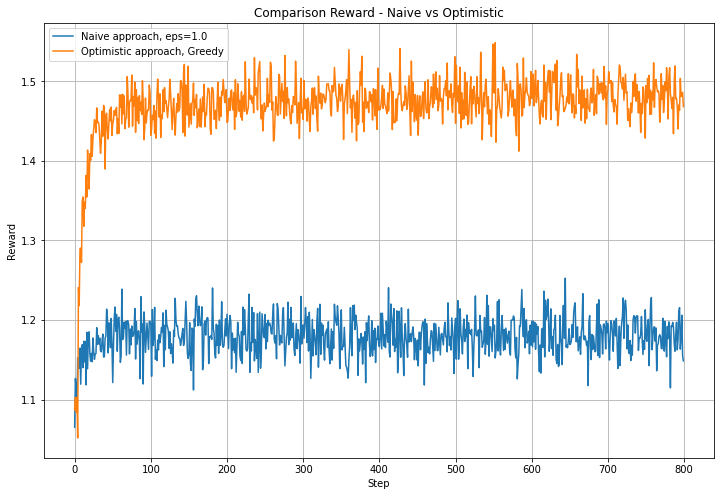

In [47]:
column = 'reward'
best_epsilon = gaus_results_naive_half[naive_argmax]['param'].iloc[0]
figsize=(12, 8)

split = column.split('_')
split[0] = split[0][0].upper() + split[0][1:]
ylabel = ' '.join(split)

plt.figure(figsize=figsize)
plt.plot(gaus_results_naive_half[naive_argmax][column], label=f"Naive approach, eps={best_epsilon}")
plt.plot(gaus_results_opt_half[0][column], label=f"Optimistic approach, Greedy")
plt.grid(True)
plt.xlabel("Step")
plt.ylabel(ylabel)
plt.legend()
plt.title(f"Comparison {ylabel} - Naive vs Optimistic")
plt.show()

# UCB

## Naive approach

In [48]:
with open("./UCB_BernoulliArm_1.0_Naive_results.pkl", 'rb') as f:
    ucb_bernoulli = pickle.load(f)
    
with open("./UCB_GaussianArm_1.0_Naive_results.pkl", 'rb') as f:
    ucb_gaussian = pickle.load(f)

In [49]:
ucb_bern_results = []
for df in tqdm(ucb_bernoulli):
    ucb_bern_results.append(process(df, False))
    
ucb_gaus_results = []
for df in tqdm(ucb_gaussian):
    ucb_gaus_results.append(process(df, False))

100%|██████████| 5/5 [00:27<00:00,  5.46s/it]


In [50]:
del ucb_bernoulli
del ucb_gaussian
gc.collect()

39050

### Optimal Action %

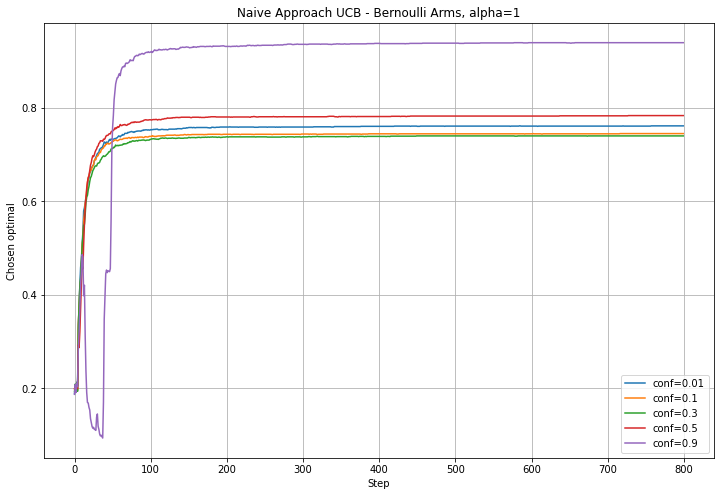

In [51]:
plot_results(ucb_bern_results, column='chosen_optimal', 
             title="Naive Approach UCB - Bernoulli Arms, alpha=1", model="ucb")

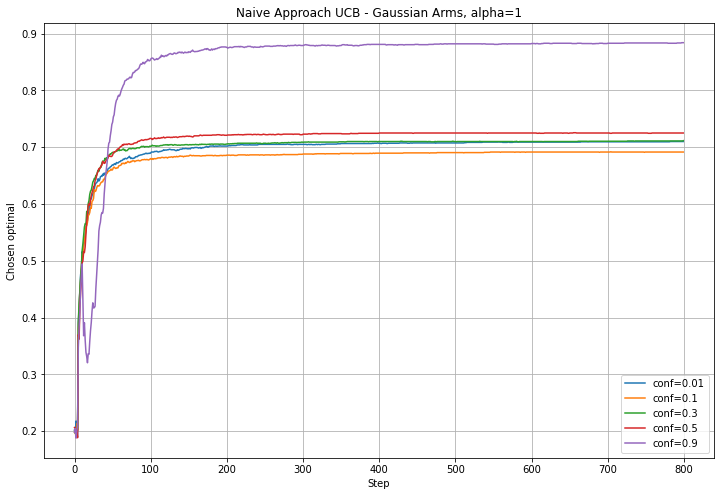

In [52]:
plot_results(ucb_gaus_results, column='chosen_optimal', 
             title="Naive Approach UCB - Gaussian Arms, alpha=1", model="ucb")

### Average Reward

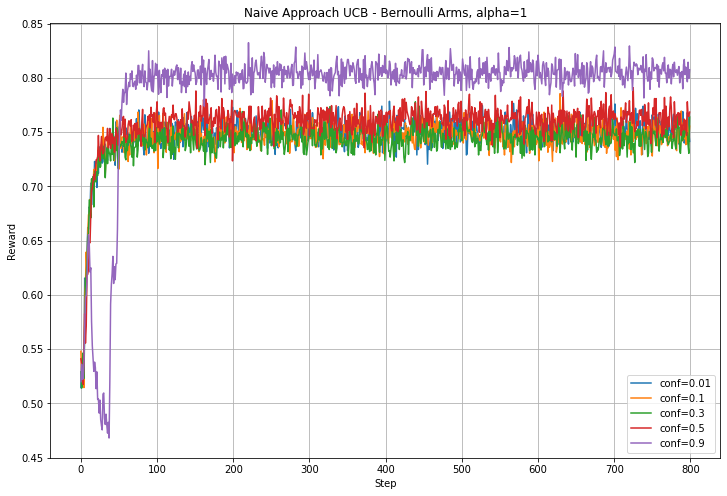

In [53]:
plot_results(ucb_bern_results, column='reward', 
             title="Naive Approach UCB - Bernoulli Arms, alpha=1", model="ucb")

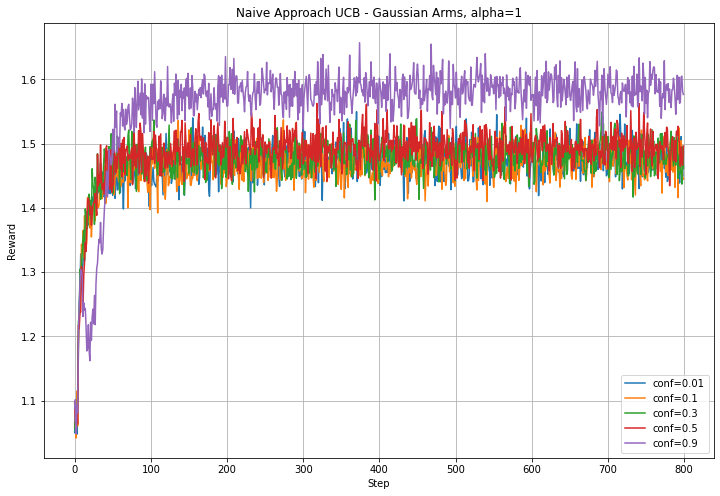

In [54]:
plot_results(ucb_gaus_results, column='reward', 
             title="Naive Approach UCB - Gaussian Arms, alpha=1", model="ucb")

## Optimistic approach

In [55]:
with open("./UCB_BernoulliArm_1.0_Optimistic_results.pkl", 'rb') as f:
    ucb_bernoulli_opt = pickle.load(f)
    
with open("./UCB_GaussianArm_1.0_Optimistic_results.pkl", 'rb') as f:
    ucb_gaussian_opt = pickle.load(f)

In [56]:
ucb_bern_results_opt = []
for df in tqdm(ucb_bernoulli_opt):
    ucb_bern_results_opt.append(process(df, False))
    
ucb_gaus_results_opt = []
for df in tqdm(ucb_gaussian_opt):
    ucb_gaus_results_opt.append(process(df, False))

100%|██████████| 5/5 [00:28<00:00,  5.64s/it]


In [57]:
del ucb_bernoulli_opt
del ucb_gaussian_opt
gc.collect()

14329

### Optimal Action %

In [58]:
plot_results(ucb_bern_results_opt, column='chosen_optimal', 
             title="Optimistic Approach UCB - Bernoulli Arms, alpha=1", model="ucb")

In [59]:
plot_results(ucb_gaus_results, column='chosen_optimal', 
             title="Optimistic Approach UCB - Gaussian Arms, alpha=1", model="ucb")

### Average Reward

In [60]:
plot_results(ucb_bern_results_opt, column='reward', 
             title="Optimistic Approach UCB - Bernoulli Arms, alpha=1", model="ucb")

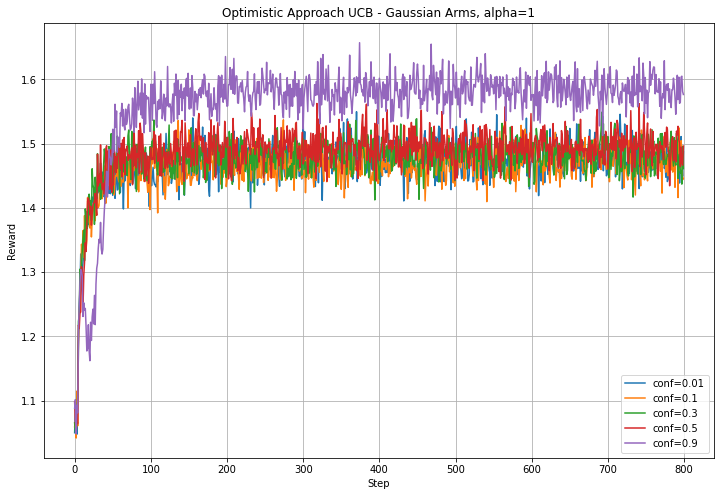

In [61]:
plot_results(ucb_gaus_results_opt, column='reward', 
             title="Optimistic Approach UCB - Gaussian Arms, alpha=1", model="ucb")

# UCB vs MAB

## UCB vs Naive - Bernoulli

### Optimal action %

In [62]:
## find the best epsilon
naive_mean_choices = [item['chosen_optimal'].mean() for item in bern_results_naive_1]
naive_argmax = np.argmax(naive_mean_choices)

print(f"Naive Approach\t Best epsilon - {bern_results_naive_1[naive_argmax]['param'].iloc[0]}")

Naive Approach	 Best epsilon - 0.1


In [63]:
## find the best conf
ucb_mean_choices = [item['chosen_optimal'].mean() for item in ucb_bern_results]
ucb_bern_argmax = np.argmax(ucb_mean_choices)

print(f"UCB\t Best conf - {ucb_bern_results[ucb_bern_argmax]['param'].iloc[0]}")

UCB	 Best conf - 0.9


In [64]:
column = 'chosen_optimal'
best_epsilon = bern_results_naive_1[naive_argmax]['param'].iloc[0]
best_conf = ucb_bern_results[ucb_bern_argmax]['param'].iloc[0]
figsize=(12, 8)

split = column.split('_')
split[0] = split[0][0].upper() + split[0][1:]
ylabel = ' '.join(split)

plt.figure(figsize=figsize)
plt.plot(bern_results_naive_1[naive_argmax][column], label=f"MAB, eps={best_epsilon}")
plt.plot(ucb_bern_results[ucb_bern_argmax][column], label=f"UCB, conf={best_conf}")
plt.grid(True)
plt.xlabel("Step")
plt.ylabel(ylabel)
plt.legend()
plt.title(f"Comparison {ylabel} - UCB vs MAB")
plt.show()

### Average reward

In [65]:
## find the best epsilon
naive_mean_reward = [item['reward'].mean() for item in bern_results_naive_1]
naive_argmax = np.argmax(naive_mean_reward)

print(f"Naive Approach\t Best epsilon - {bern_results_naive_1[naive_argmax]['param'].iloc[0]}")

Naive Approach	 Best epsilon - 0.1


In [66]:
## find the best conf
ucb_mean_choices = [item['reward'].mean() for item in ucb_bern_results]
ucb_bern_argmax = np.argmax(ucb_mean_choices)

print(f"UCB\t Best conf - {ucb_bern_results[ucb_bern_argmax]['param'].iloc[0]}")

UCB	 Best conf - 0.9


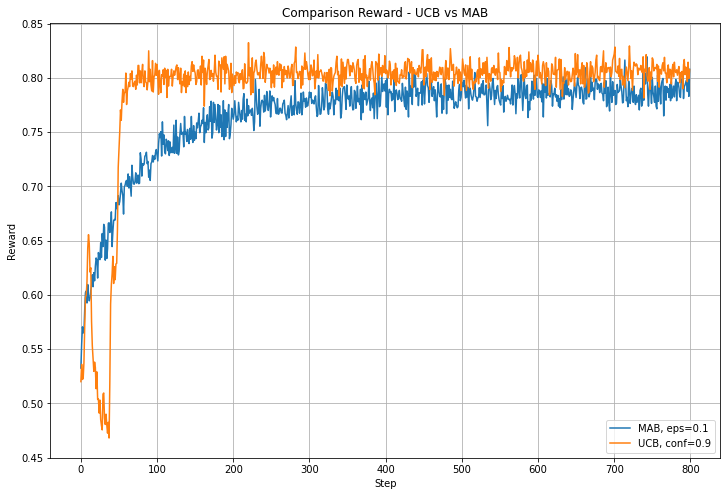

In [67]:
column = 'reward'
best_epsilon = gaus_results_naive_half[naive_argmax]['param'].iloc[0]
best_conf = ucb_bern_results[ucb_bern_argmax]['param'].iloc[0]
figsize=(12, 8)

split = column.split('_')
split[0] = split[0][0].upper() + split[0][1:]
ylabel = ' '.join(split)

plt.figure(figsize=figsize)
plt.plot(bern_results_naive_1[naive_argmax][column], label=f"MAB, eps={best_epsilon}")
plt.plot(ucb_bern_results[ucb_bern_argmax][column], label=f"UCB, conf={best_conf}")
plt.grid(True)
plt.xlabel("Step")
plt.ylabel(ylabel)
plt.legend()
plt.title(f"Comparison {ylabel} - UCB vs MAB")
plt.show()

## UCB vs Naive - Gaussian

### Optimal action %

In [68]:
## find the best epsilon
naive_mean_choices = [item['chosen_optimal'].mean() for item in gaus_results_naive_1]
naive_argmax = np.argmax(naive_mean_choices)

print(f"Naive Approach\t Best epsilon - {gaus_results_naive_1[naive_argmax]['param'].iloc[0]}")

Naive Approach	 Best epsilon - 0.1


In [69]:
## find the best conf
ucb_mean_choices = [item['chosen_optimal'].mean() for item in ucb_gaus_results]
ucb_gaus_argmax = np.argmax(ucb_mean_choices)

print(f"UCB\t Best conf - {ucb_gaus_results[ucb_gaus_argmax]['param'].iloc[0]}")

UCB	 Best conf - 0.9


In [70]:
column = 'chosen_optimal'
best_epsilon = gaus_results_naive_1[naive_argmax]['param'].iloc[0]
best_conf = ucb_gaus_results[ucb_gaus_argmax]['param'].iloc[0]
figsize=(12, 8)

split = column.split('_')
split[0] = split[0][0].upper() + split[0][1:]
ylabel = ' '.join(split)

plt.figure(figsize=figsize)
plt.plot(gaus_results_naive_1[naive_argmax][column], label=f"MAB, eps={best_epsilon}")
plt.plot(ucb_gaus_results[ucb_gaus_argmax][column], label=f"UCB, conf={best_conf}")
plt.grid(True)
plt.xlabel("Step")
plt.ylabel(ylabel)
plt.legend()
plt.title(f"Comparison {ylabel} - UCB vs MAB")
plt.show()

### Average reward

In [71]:
## find the best epsilon
naive_mean_reward = [item['reward'].mean() for item in gaus_results_naive_1]
naive_argmax = np.argmax(naive_mean_reward)

print(f"Naive Approach\t Best epsilon - {gaus_results_naive_1[naive_argmax]['param'].iloc[0]}")

Naive Approach	 Best epsilon - 0.1


In [72]:
## find the best conf
ucb_mean_choices = [item['reward'].mean() for item in ucb_gaus_results]
ucb_gaus_argmax = np.argmax(ucb_mean_choices)

print(f"UCB\t Best conf - {ucb_gaus_results[ucb_gaus_argmax]['param'].iloc[0]}")

UCB	 Best conf - 0.9


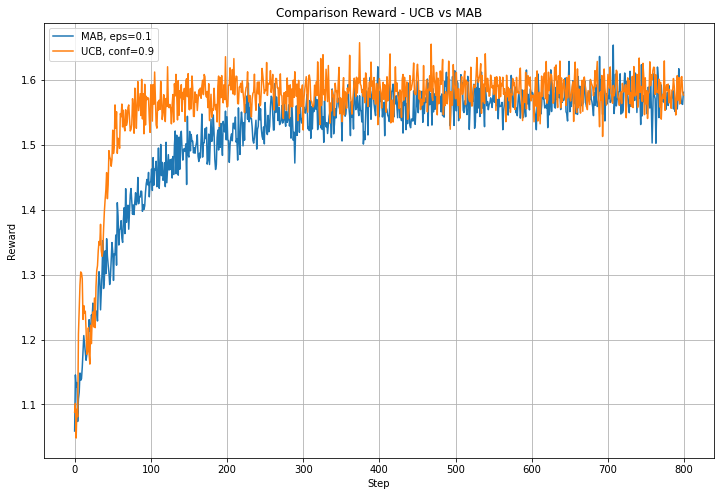

In [73]:
column = 'reward'
best_epsilon = gaus_results_naive_1[naive_argmax]['param'].iloc[0]
best_conf = ucb_gaus_results[ucb_gaus_argmax]['param'].iloc[0]
figsize=(12, 8)

split = column.split('_')
split[0] = split[0][0].upper() + split[0][1:]
ylabel = ' '.join(split)

plt.figure(figsize=figsize)
plt.plot(gaus_results_naive_1[naive_argmax][column], label=f"MAB, eps={best_epsilon}")
plt.plot(ucb_gaus_results[ucb_gaus_argmax][column], label=f"UCB, conf={best_conf}")
plt.grid(True)
plt.xlabel("Step")
plt.ylabel(ylabel)
plt.legend()
plt.title(f"Comparison {ylabel} - UCB vs MAB")
plt.show()

# Explore-then-Commit

## Naive Approach

In [74]:
with open("./ETC_BernoulliArm_1.0_Naive_results.pkl", 'rb') as f:
    etc_bernoulli = pickle.load(f)
    
with open("./ETC_GaussianArm_1.0_Naive_results.pkl", 'rb') as f:
    etc_gaussian = pickle.load(f)

In [75]:
bern_etc_results = []
for df in tqdm(etc_bernoulli):
    bern_etc_results.append(process(df, False))
    
gaus_etc_results = []
for df in tqdm(etc_gaussian):
    gaus_etc_results.append(process(df, False))

100%|██████████| 5/5 [00:27<00:00,  5.59s/it]


In [76]:
del etc_bernoulli
del etc_gaussian
gc.collect()

27054

### Optimal Action %

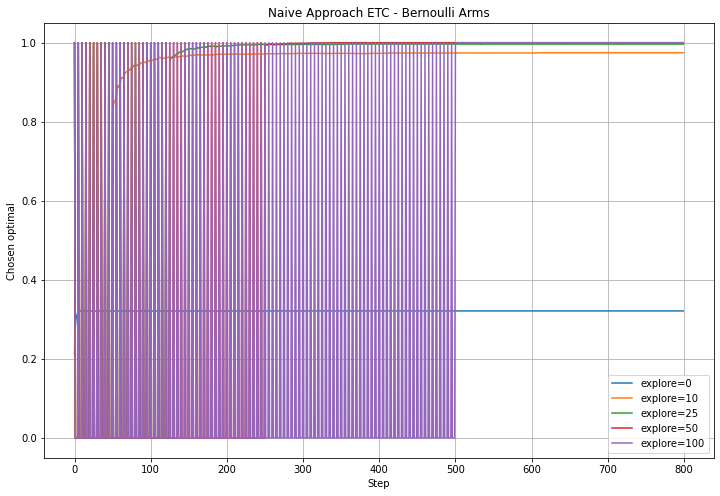

In [77]:
plot_results(bern_etc_results, column='chosen_optimal', 
             title="Naive Approach ETC - Bernoulli Arms", model="etc")

In [78]:
plot_results(gaus_etc_results, column='chosen_optimal', 
             title="Naive Approach ETC - Gaussian Arms, alpha=1", model="etc")

### Average Reward

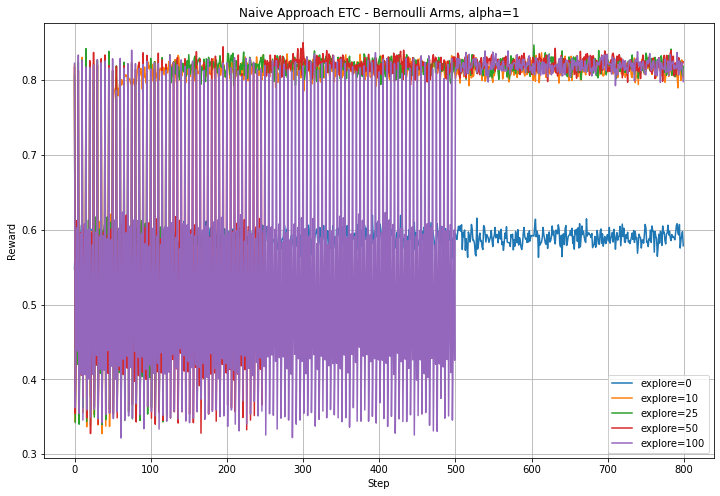

In [79]:
plot_results(bern_etc_results, column='reward', 
             title="Naive Approach ETC - Bernoulli Arms, alpha=1", model="etc")

In [80]:
plot_results(gaus_etc_results, column='reward', 
             title="Naive Approach ETC - Gaussian Arms, alpha=1", model="etc")

# Thompson Sampling

In [81]:
with open("./ThompsonSampling_BernoulliArm_1.0_Naive_results.pkl", 'rb') as f:
    ts_bernoulli = pickle.load(f)
    
with open("./ThompsonSampling_GaussianArm_1.0_Naive_results.pkl", 'rb') as f:
    ts_gaussian = pickle.load(f)

In [82]:
ts_bern_result = process(ts_bernoulli, is_thompson=True)
ts_gaus_result = process(ts_gaussian, is_thompson=True)

In [83]:
del ts_bernoulli
del ts_gaussian
gc.collect()

13784

In [84]:
plot_results(ts_bern_result, column='chosen_optimal', 
             title="Thompson Sampling - Bernoulli Arms", model="thompson")

In [85]:
plot_results(ts_gaus_result, column='chosen_optimal', 
             title="Thompson Sampling - Gaussian Arms", model="thompson")

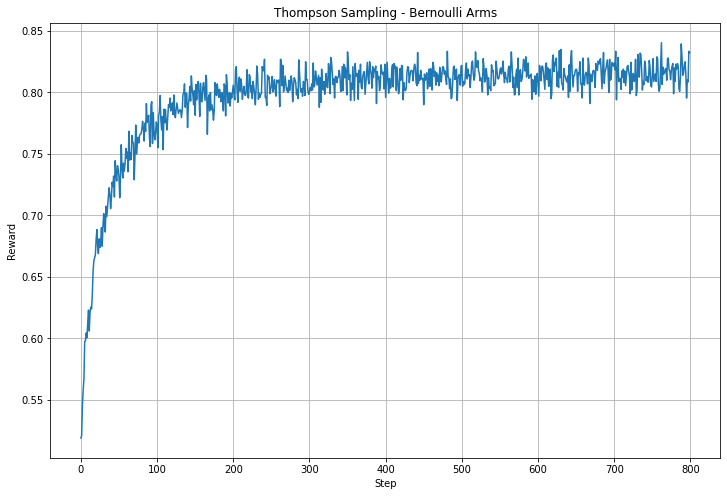

In [86]:
plot_results(ts_bern_result, column='reward', 
             title="Thompson Sampling - Bernoulli Arms", model="thompson")

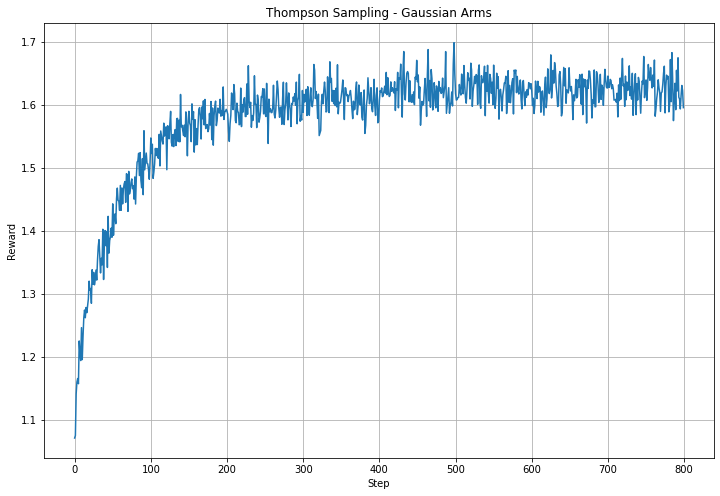

In [87]:
plot_results(ts_gaus_result, column='reward', 
             title="Thompson Sampling - Gaussian Arms", model="thompson")

# Comparison

## Bernoulli Arm

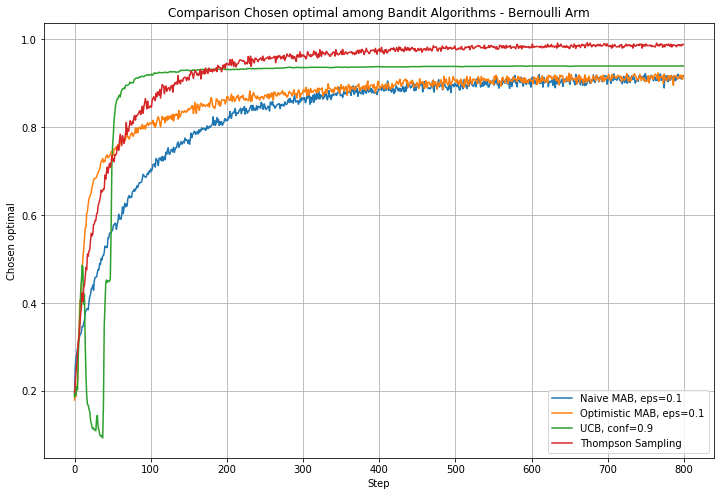

In [88]:
column = 'chosen_optimal'

## find the best epsilon - naive approach
naive_mean_choices = [item[column].mean() for item in bern_results_naive_1]
naive_argmax = np.argmax(naive_mean_choices)

## find the best epsilon - optimistic approach
opt_mean_choices = [item[column].mean() for item in bern_results_opt_1]
opt_argmax = np.argmax(opt_mean_choices)

## find the best conf - UCB approach
ucb_mean_choices = [item[column].mean() for item in ucb_bern_results]
ucb_bern_argmax = np.argmax(ucb_mean_choices)

naive_best_epsilon = bern_results_naive_1[naive_argmax]['param'].iloc[0]
opt_best_epsilon = bern_results_opt_1[opt_argmax]['param'].iloc[0]
best_conf = ucb_bern_results[ucb_bern_argmax]['param'].iloc[0]

figsize=(12, 8)
split = column.split('_')
split[0] = split[0][0].upper() + split[0][1:]
ylabel = ' '.join(split)

plt.figure(figsize=figsize)
plt.plot(bern_results_naive_1[naive_argmax][column], label=f"Naive MAB, eps={naive_best_epsilon}")
plt.plot(bern_results_opt_1[opt_argmax][column], label=f"Optimistic MAB, eps={opt_best_epsilon}")
plt.plot(ucb_bern_results[ucb_bern_argmax][column], label=f"UCB, conf={best_conf}")
plt.plot(ts_bern_result[column], label=f"Thompson Sampling")
plt.grid(True)
plt.xlabel("Step")
plt.ylabel(ylabel)
plt.legend()
plt.title(f"Comparison {ylabel} among Bandit Algorithms - Bernoulli Arm")
plt.show()

In [89]:
column = 'reward'
figsize=(12, 8)
split = column.split('_')
split[0] = split[0][0].upper() + split[0][1:]
ylabel = ' '.join(split)

plt.figure(figsize=figsize)
plt.plot(bern_results_naive_1[naive_argmax][column], label=f"Naive MAB, eps={naive_best_epsilon}")
plt.plot(bern_results_opt_1[opt_argmax][column], label=f"Optimistic MAB, eps={opt_best_epsilon}")
plt.plot(ucb_bern_results[ucb_bern_argmax][column], label=f"UCB, conf={best_conf}")
plt.plot(ts_bern_result[column], label=f"Thompson Sampling")
plt.grid(True)
plt.xlabel("Step")
plt.ylabel(ylabel)
plt.legend()
plt.title(f"Comparison {ylabel} among Bandit Algorithms - Bernoulli Arm")
plt.show()

## Gaussian Arm

In [90]:
column = 'chosen_optimal'

## find the best epsilon - naive approach
naive_mean_choices = [item[column].mean() for item in gaus_results_naive_1]
naive_argmax = np.argmax(naive_mean_choices)

## find the best epsilon - optimistic approach
opt_mean_choices = [item[column].mean() for item in gaus_results_opt_1]
opt_argmax = np.argmax(opt_mean_choices)

## find the best conf - UCB approach
ucb_mean_choices = [item[column].mean() for item in ucb_gaus_results]
ucb_gaus_argmax = np.argmax(ucb_mean_choices)

naive_best_epsilon = gaus_results_naive_1[naive_argmax]['param'].iloc[0]
opt_best_epsilon = gaus_results_opt_1[opt_argmax]['param'].iloc[0]
best_conf = ucb_gaus_results[ucb_gaus_argmax]['param'].iloc[0]

figsize=(12, 8)
split = column.split('_')
split[0] = split[0][0].upper() + split[0][1:]
ylabel = ' '.join(split)

plt.figure(figsize=figsize)
plt.plot(gaus_results_naive_1[naive_argmax][column], label=f"Naive MAB, eps={naive_best_epsilon}")
plt.plot(gaus_results_opt_1[opt_argmax][column], label=f"Optimistic MAB, eps={opt_best_epsilon}")
plt.plot(ucb_gaus_results[ucb_gaus_argmax][column], label=f"UCB, conf={best_conf}")
plt.plot(ts_gaus_result[column], label=f"Thompson Sampling")
plt.grid(True)
plt.xlabel("Step")
plt.ylabel(ylabel)
plt.legend()
plt.title(f"Comparison {ylabel} among Bandit Algorithms - Gaussian Arm")
plt.show()

In [91]:
column = 'reward'

figsize=(12, 8)
split = column.split('_')
split[0] = split[0][0].upper() + split[0][1:]
ylabel = ' '.join(split)

plt.figure(figsize=figsize)
plt.plot(gaus_results_naive_1[naive_argmax][column], label=f"Naive MAB, eps={naive_best_epsilon}")
plt.plot(gaus_results_opt_1[opt_argmax][column], label=f"Optimistic MAB, eps={opt_best_epsilon}")
plt.plot(ucb_gaus_results[ucb_gaus_argmax][column], label=f"UCB, conf={best_conf}")
plt.plot(ts_gaus_result[column], label=f"Thompson Sampling")
plt.grid(True)
plt.xlabel("Step")
plt.ylabel(ylabel)
plt.legend()
plt.title(f"Comparison {ylabel} among Bandit Algorithms - Gaussian Arm")
plt.show()